In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def get_borders(image,size):
	#STANGA,DREAPTA,SUS,JOS
	for column,i in zip(image.T,range(size)):
		if(np.count_nonzero(column == 0.0)!=size):
			left_border = i
			break
   
	for row,i in zip(image,range(size)):
		if(np.count_nonzero(row == 0.0)!=size):
			upper_border = i
			break

	for column,i in zip(np.flip(image.T),range(size)):
		if(np.count_nonzero(column == 0.0)!=size):
			right_border = i
			break

	for row,i in zip(np.flip(image),range(size)):
		if(np.count_nonzero(row == 0.0)!=size):
			bottom_border = i
			break

	return [left_border,right_border,upper_border,bottom_border]

def crop_image(image,upper,lower,left,right,size):
	return np.copy(image[upper:size-lower,left:size-right])

def generate_bordari_sizes(min,max):
    #sus,jos / stanga,dreapta
	sizes = []
	for i in range(min+max+1):
		pair = (i,min+max-i)
		sizes.append(pair)
	return sizes

def pad_with(vector, pad_width, iaxis, kwargs):
	pad_value = kwargs.get('padder', 0)
	vector[:pad_width[0]] = pad_value
	if pad_width[1] != 0:                      # <-- the only change (0 indicates no padding)
		vector[-pad_width[1]:] = pad_value
  
def generate_imagini_bordate(image,output,size):
	imagini_bordate = []
	outputuri_bordate = []
	stanga,dreapta,sus,jos = get_borders(image,size)
	tipuri_bordare1 = generate_bordari_sizes(sus,jos)
	tipuri_bordare2 = generate_bordari_sizes(stanga,dreapta)
	imagine_cropped = crop_image(image,sus,jos,stanga,dreapta,size)	
	for tip1 in tipuri_bordare1:
		for tip2 in tipuri_bordare2:
			imagini_bordate.append(np.pad(imagine_cropped,(tip1, tip2), pad_with, padder=0))
			outputuri_bordate.append(output)
	return imagini_bordate,outputuri_bordate

def generate_imagini_bordate_no_output(image,size):
	imagini_bordate = []
	stanga,dreapta,sus,jos = get_borders(image,size)
	tipuri_bordare1 = generate_bordari_sizes(sus,jos)
	tipuri_bordare2 = generate_bordari_sizes(stanga,dreapta)
	imagine_cropped = crop_image(image,sus,jos,stanga,dreapta,size)	
	for tip1 in tipuri_bordare1:
		for tip2 in tipuri_bordare2:
			imagini_bordate.append(np.pad(imagine_cropped,(tip1, tip2), pad_with, padder=0))
	return imagini_bordate

def plot_bordare_demo(imagine,size):
	stanga,dreapta,sus,jos = get_borders(imagine,size)
	fig_w = sus+jos+1
	fig_h = stanga+dreapta+1
	imagini_bordate = generate_imagini_bordate_no_output(imagine,size)
	fig, axes = plt.subplots(fig_h, fig_w, figsize = (size, fig_h*3))
	fig.tight_layout() 
	for i in range(0, fig_h):
		for j in range(0, fig_w):
			axes[i][j].imshow(np.reshape(imagini_bordate[fig_w * i + j],(size,size)),cmap='gist_gray')
			axes[i][j].set_axis_off()
	plt.show()
 
def plot_imagini_demo(imagini,outputuri,size):
	fig_w = 10
	fig_h = 2

	fig, axes = plt.subplots(fig_h, fig_w, figsize = (size, fig_h*3))
	fig.tight_layout() 
	for i in range(0, fig_h):
		for j in range(0, fig_w):
			axes[i][j].imshow(np.reshape(imagini[fig_w * i + j],(size,size)),cmap='gist_gray')#inferno
			axes[i][j].set_title(str(np.argmax(outputuri[fig_w*i+j])),fontsize=40)
			axes[i][j].set_axis_off()     
	plt.show()

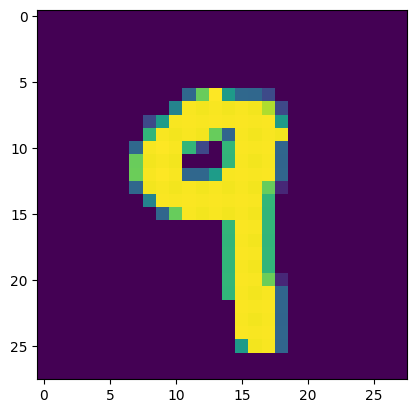

In [3]:
date = pd.read_csv("sample_bordare.csv",delimiter=",")
imagine = np.array(date.values.tolist())/255.0
#train_X = np.array([np.reshape(el,(28,28)) for el in train_X])
imagine = np.reshape(imagine[0],(28,28))
plt.imshow(imagine)

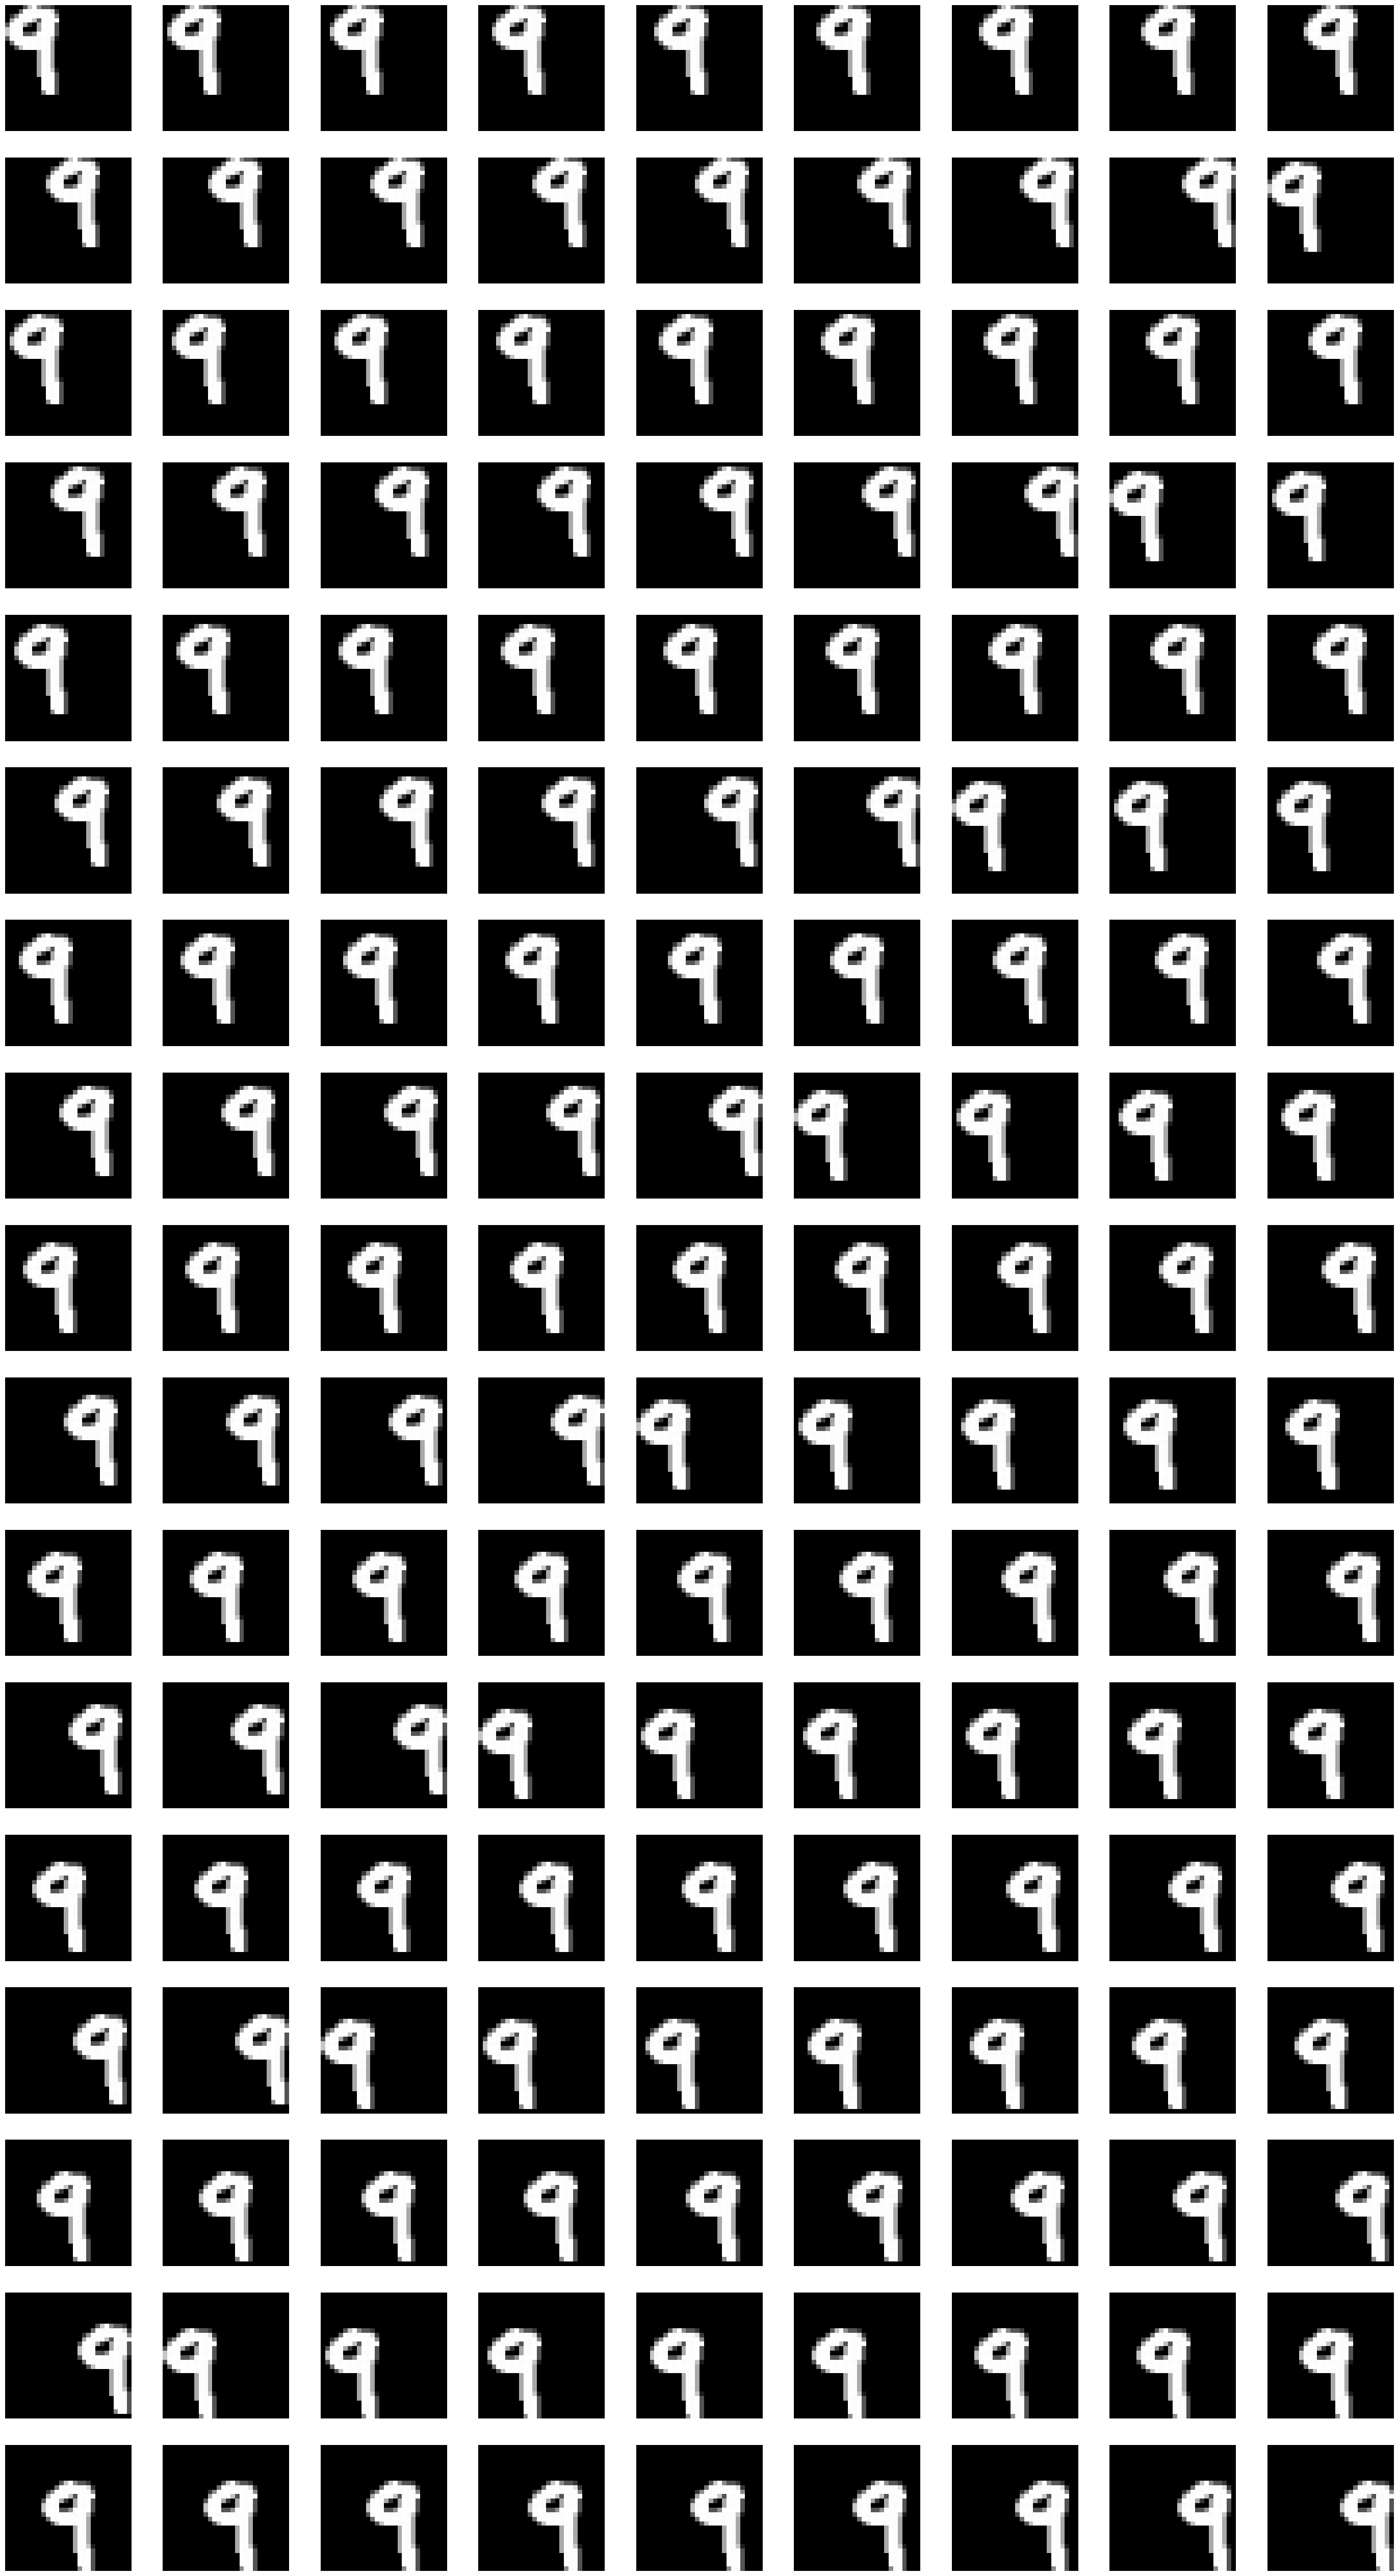

In [4]:
plot_bordare_demo(imagine,28)